# Crime Prediction - Ethos Hackathon

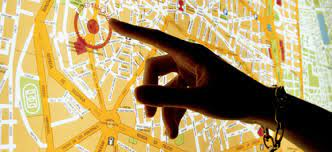

In [1]:
import pandas as pd
import numpy as np
import sweetviz

## Importing dataset 

In [2]:
data = pd.read_csv("crime.csv",encoding = 'latin1')

In [3]:
data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


### Crimes we are mainly focusing on 

#### accident, Drugs, assault(Simple Assault+Aggravated Assault), larceny, Violations

## EDA with feature selection and preprocessing of data 

In [4]:
data = data.drop(['INCIDENT_NUMBER','OFFENSE_CODE'],axis = 1)

In [5]:
data['OFFENSE_CODE_GROUP'].unique()

array(['Larceny', 'Vandalism', 'Towed', 'Investigate Property',
       'Motor Vehicle Accident Response', 'Auto Theft', 'Verbal Disputes',
       'Robbery', 'Fire Related Reports', 'Other', 'Property Lost',
       'Medical Assistance', 'Assembly or Gathering Violations',
       'Larceny From Motor Vehicle', 'Residential Burglary',
       'Simple Assault', 'Restraining Order Violations', 'Violations',
       'Harassment', 'Ballistics', 'Property Found',
       'Police Service Incidents', 'Drug Violation', 'Warrant Arrests',
       'Disorderly Conduct', 'Property Related Damage',
       'Missing Person Reported', 'Investigate Person', 'Fraud',
       'Aggravated Assault', 'License Plate Related Incidents',
       'Firearm Violations', 'Other Burglary', 'Arson', 'Bomb Hoax',
       'Harbor Related Incidents', 'Counterfeiting', 'Liquor Violation',
       'Firearm Discovery', 'Landlord/Tenant Disputes',
       'Missing Person Located', 'Auto Theft Recovery', 'Service',
       'Operating Und

In [6]:
data[data['OFFENSE_CODE_GROUP']=='Motor Vehicle Accident Response']

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
21,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,A1,69,NaN,2018-09-03 18:30:00,2018,9,Monday,18,Part Three,BEACON ST,42.355644,-71.071681,"(42.35564426, -71.07168077)"
23,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,E5,550,NaN,2018-09-03 18:33:00,2018,9,Monday,18,Part Three,WASHINGTON ST,42.275818,-71.139913,"(42.27581799, -71.13991259)"
25,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2018-09-03 18:20:00,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)"
44,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,C11,402,NaN,2018-09-03 15:34:00,2018,9,Monday,15,Part Three,WASHINGTON ST,42.284926,-71.071353,"(42.28492596, -71.07135254)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318667,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER CITY VEHICLE,D4,170,NaN,2015-06-15 09:05:00,2015,6,Monday,9,Part Three,WASHINGTON ST,42.337444,-71.075636,"(42.33744400, -71.07563631)"
318671,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,D4,270,NaN,2015-06-15 08:33:00,2015,6,Monday,8,Part Three,HARRISON AVE,42.332102,-71.079283,"(42.33210200, -71.07928300)"
318672,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,D4,154,NaN,2015-06-15 07:34:00,2015,6,Monday,7,Part Three,W NEWTON ST,42.342259,-71.077497,"(42.34225888, -71.07749696)"
318676,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,E18,490,NaN,2015-06-15 07:31:00,2015,6,Monday,7,Part Three,CUMMINS HWY,42.275316,-71.110819,"(42.27531600, -71.11081942)"


In [7]:
def accident(cols):
    acc = cols[0]
    if acc == 'Motor Vehicle Accident Response':
        return 'Accident'
    elif acc == 'Drug Violation':
        return 'Drugs'
    elif acc == 'Restraining Order Violations':
        return 'Violation'
    elif acc == 'Simple Assault' or acc == 'Aggravated Assault':
        return 'Assault'
    elif acc == 'Larceny':
        return 'Larceny'
data['OFFENSE_CODE_GROUP']= data[['OFFENSE_CODE_GROUP']].apply(accident,axis = 1)    

In [8]:
data[data['OFFENSE_CODE_GROUP']=='Larceny']

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
36,Larceny,LARCENY SHOPLIFTING,B2,276,NaN,2018-09-03 17:54:00,2018,9,Monday,17,Part One,SHAWMUT AVE,42.333183,-71.083076,"(42.33318299, -71.08307607)"
45,Larceny,LARCENY ALL OTHERS,B3,456,NaN,2018-09-03 17:17:00,2018,9,Monday,17,Part One,ELLINGTON ST,42.301546,-71.081182,"(42.30154555, -71.08118184)"
54,Larceny,LARCENY THEFT FROM BUILDING,A1,102,NaN,2018-09-03 16:00:00,2018,9,Monday,16,Part One,WINTER ST,42.356024,-71.061776,"(42.35602373, -71.06177615)"
60,Larceny,LARCENY THEFT OF BICYCLE,D14,790,NaN,2018-09-03 06:15:00,2018,9,Monday,6,Part One,CHESTNUT HILL AVE,42.335400,-71.150257,"(42.33539970, -71.15025675)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319007,Larceny,LARCENY IN A BUILDING $200 & OVER,B3,428,NaN,2015-12-07 11:38:00,2015,12,Monday,11,Part One,DIXWELL ST,42.314334,-71.097914,"(42.31433402, -71.09791405)"
319026,Larceny,LARCENY ALL OTHERS,B2,911,NaN,2016-04-27 00:00:00,2016,4,Wednesday,0,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
319044,Larceny,LARCENY SHOPLIFTING $50 TO $199,D4,171,NaN,2015-07-22 22:00:00,2015,7,Wednesday,22,Part One,HARRISON AVE,42.335560,-71.074364,"(42.33555954, -71.07436364)"
319048,Larceny,LARCENY OTHER $200 & OVER,B2,324,NaN,2016-07-29 00:00:00,2016,7,Friday,0,Part One,BOWDOIN ST,42.307038,-71.066153,"(42.30703835, -71.06615319)"


In [9]:
data1 = data[data['OFFENSE_CODE_GROUP']=='Accident']
data2 = data[data['OFFENSE_CODE_GROUP']=='Drugs']
data3 = data[data['OFFENSE_CODE_GROUP']=='Violation']
data4 = data[data['OFFENSE_CODE_GROUP']=='Assault']
data5 = data[data['OFFENSE_CODE_GROUP']=='Larceny']

In [10]:
data = pd.concat([data1,data2,data3,data4,data5],axis = 0)

In [11]:
data

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5,Accident,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
21,Accident,M/V ACCIDENT - OTHER,A1,69,NaN,2018-09-03 18:30:00,2018,9,Monday,18,Part Three,BEACON ST,42.355644,-71.071681,"(42.35564426, -71.07168077)"
23,Accident,M/V ACCIDENT - PERSONAL INJURY,E5,550,NaN,2018-09-03 18:33:00,2018,9,Monday,18,Part Three,WASHINGTON ST,42.275818,-71.139913,"(42.27581799, -71.13991259)"
25,Accident,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2018-09-03 18:20:00,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)"
44,Accident,M/V ACCIDENT - PROPERTY DAMAGE,C11,402,NaN,2018-09-03 15:34:00,2018,9,Monday,15,Part Three,WASHINGTON ST,42.284926,-71.071353,"(42.28492596, -71.07135254)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319007,Larceny,LARCENY IN A BUILDING $200 & OVER,B3,428,NaN,2015-12-07 11:38:00,2015,12,Monday,11,Part One,DIXWELL ST,42.314334,-71.097914,"(42.31433402, -71.09791405)"
319026,Larceny,LARCENY ALL OTHERS,B2,911,NaN,2016-04-27 00:00:00,2016,4,Wednesday,0,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
319044,Larceny,LARCENY SHOPLIFTING $50 TO $199,D4,171,NaN,2015-07-22 22:00:00,2015,7,Wednesday,22,Part One,HARRISON AVE,42.335560,-71.074364,"(42.33555954, -71.07436364)"
319048,Larceny,LARCENY OTHER $200 & OVER,B2,324,NaN,2016-07-29 00:00:00,2016,7,Friday,0,Part One,BOWDOIN ST,42.307038,-71.066153,"(42.30703835, -71.06615319)"


In [12]:
data.isnull().sum()

OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                  792
REPORTING_AREA              0
SHOOTING               104289
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                    0
STREET                   5540
Lat                     10163
Long                    10163
Location                    0
dtype: int64

In [13]:
data['OFFENSE_CODE_GROUP'].unique()

array(['Accident', 'Drugs', 'Violation', 'Assault', 'Larceny'],
      dtype=object)

In [14]:
def name_change(cols):
    Crime = cols[0]
    if(Crime=='Accident'):
        Crime = 0
    elif(Crime=='Drugs'):
        Crime = 1
    elif(Crime=='Violation'):
        Crime = 2 
    elif(Crime=='Assault'):
        Crime = 3 
    elif(Crime=='Larceny'):
        Crime = 4 
    return Crime    
data['OFFENSE_CODE_GROUP'] = data[['OFFENSE_CODE_GROUP']].apply(name_change,axis=1)

In [15]:
data['OFFENSE_CODE_GROUP'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [16]:
data

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5,0,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
21,0,M/V ACCIDENT - OTHER,A1,69,NaN,2018-09-03 18:30:00,2018,9,Monday,18,Part Three,BEACON ST,42.355644,-71.071681,"(42.35564426, -71.07168077)"
23,0,M/V ACCIDENT - PERSONAL INJURY,E5,550,NaN,2018-09-03 18:33:00,2018,9,Monday,18,Part Three,WASHINGTON ST,42.275818,-71.139913,"(42.27581799, -71.13991259)"
25,0,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2018-09-03 18:20:00,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)"
44,0,M/V ACCIDENT - PROPERTY DAMAGE,C11,402,NaN,2018-09-03 15:34:00,2018,9,Monday,15,Part Three,WASHINGTON ST,42.284926,-71.071353,"(42.28492596, -71.07135254)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319007,4,LARCENY IN A BUILDING $200 & OVER,B3,428,NaN,2015-12-07 11:38:00,2015,12,Monday,11,Part One,DIXWELL ST,42.314334,-71.097914,"(42.31433402, -71.09791405)"
319026,4,LARCENY ALL OTHERS,B2,911,NaN,2016-04-27 00:00:00,2016,4,Wednesday,0,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
319044,4,LARCENY SHOPLIFTING $50 TO $199,D4,171,NaN,2015-07-22 22:00:00,2015,7,Wednesday,22,Part One,HARRISON AVE,42.335560,-71.074364,"(42.33555954, -71.07436364)"
319048,4,LARCENY OTHER $200 & OVER,B2,324,NaN,2016-07-29 00:00:00,2016,7,Friday,0,Part One,BOWDOIN ST,42.307038,-71.066153,"(42.30703835, -71.06615319)"


In [17]:
data = data.drop(['SHOOTING'],axis = 1)

In [18]:
data

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5,0,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
21,0,M/V ACCIDENT - OTHER,A1,69,2018-09-03 18:30:00,2018,9,Monday,18,Part Three,BEACON ST,42.355644,-71.071681,"(42.35564426, -71.07168077)"
23,0,M/V ACCIDENT - PERSONAL INJURY,E5,550,2018-09-03 18:33:00,2018,9,Monday,18,Part Three,WASHINGTON ST,42.275818,-71.139913,"(42.27581799, -71.13991259)"
25,0,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,2018-09-03 18:20:00,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)"
44,0,M/V ACCIDENT - PROPERTY DAMAGE,C11,402,2018-09-03 15:34:00,2018,9,Monday,15,Part Three,WASHINGTON ST,42.284926,-71.071353,"(42.28492596, -71.07135254)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319007,4,LARCENY IN A BUILDING $200 & OVER,B3,428,2015-12-07 11:38:00,2015,12,Monday,11,Part One,DIXWELL ST,42.314334,-71.097914,"(42.31433402, -71.09791405)"
319026,4,LARCENY ALL OTHERS,B2,911,2016-04-27 00:00:00,2016,4,Wednesday,0,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
319044,4,LARCENY SHOPLIFTING $50 TO $199,D4,171,2015-07-22 22:00:00,2015,7,Wednesday,22,Part One,HARRISON AVE,42.335560,-71.074364,"(42.33555954, -71.07436364)"
319048,4,LARCENY OTHER $200 & OVER,B2,324,2016-07-29 00:00:00,2016,7,Friday,0,Part One,BOWDOIN ST,42.307038,-71.066153,"(42.30703835, -71.06615319)"


In [19]:
data = data.dropna()

In [20]:
data.isnull().sum()

OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [21]:
data.dtypes

OFFENSE_CODE_GROUP       int64
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [22]:
data

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5,0,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
21,0,M/V ACCIDENT - OTHER,A1,69,2018-09-03 18:30:00,2018,9,Monday,18,Part Three,BEACON ST,42.355644,-71.071681,"(42.35564426, -71.07168077)"
23,0,M/V ACCIDENT - PERSONAL INJURY,E5,550,2018-09-03 18:33:00,2018,9,Monday,18,Part Three,WASHINGTON ST,42.275818,-71.139913,"(42.27581799, -71.13991259)"
44,0,M/V ACCIDENT - PROPERTY DAMAGE,C11,402,2018-09-03 15:34:00,2018,9,Monday,15,Part Three,WASHINGTON ST,42.284926,-71.071353,"(42.28492596, -71.07135254)"
46,0,M/V ACCIDENT - OTHER,B2,901,2018-09-03 15:00:00,2018,9,Monday,15,Part Three,WARD ST,42.335111,-71.095922,"(42.33511145, -71.09592156)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319007,4,LARCENY IN A BUILDING $200 & OVER,B3,428,2015-12-07 11:38:00,2015,12,Monday,11,Part One,DIXWELL ST,42.314334,-71.097914,"(42.31433402, -71.09791405)"
319026,4,LARCENY ALL OTHERS,B2,911,2016-04-27 00:00:00,2016,4,Wednesday,0,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
319044,4,LARCENY SHOPLIFTING $50 TO $199,D4,171,2015-07-22 22:00:00,2015,7,Wednesday,22,Part One,HARRISON AVE,42.335560,-71.074364,"(42.33555954, -71.07436364)"
319048,4,LARCENY OTHER $200 & OVER,B2,324,2016-07-29 00:00:00,2016,7,Friday,0,Part One,BOWDOIN ST,42.307038,-71.066153,"(42.30703835, -71.06615319)"


In [23]:
data['UCR_PART'] = data['UCR_PART'].map({'Part One':0,'Part Two':1,'Part Three':2})

C:\Users\shray\AppData\Local\Temp\ipykernel_6456\1915474692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['UCR_PART'] = data['UCR_PART'].map({'Part One':0,'Part Two':1,'Part Three':2})


In [24]:
data

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5,0,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,2018-09-03 21:09:00,2018,9,Monday,21,2,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
21,0,M/V ACCIDENT - OTHER,A1,69,2018-09-03 18:30:00,2018,9,Monday,18,2,BEACON ST,42.355644,-71.071681,"(42.35564426, -71.07168077)"
23,0,M/V ACCIDENT - PERSONAL INJURY,E5,550,2018-09-03 18:33:00,2018,9,Monday,18,2,WASHINGTON ST,42.275818,-71.139913,"(42.27581799, -71.13991259)"
44,0,M/V ACCIDENT - PROPERTY DAMAGE,C11,402,2018-09-03 15:34:00,2018,9,Monday,15,2,WASHINGTON ST,42.284926,-71.071353,"(42.28492596, -71.07135254)"
46,0,M/V ACCIDENT - OTHER,B2,901,2018-09-03 15:00:00,2018,9,Monday,15,2,WARD ST,42.335111,-71.095922,"(42.33511145, -71.09592156)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319007,4,LARCENY IN A BUILDING $200 & OVER,B3,428,2015-12-07 11:38:00,2015,12,Monday,11,0,DIXWELL ST,42.314334,-71.097914,"(42.31433402, -71.09791405)"
319026,4,LARCENY ALL OTHERS,B2,911,2016-04-27 00:00:00,2016,4,Wednesday,0,0,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
319044,4,LARCENY SHOPLIFTING $50 TO $199,D4,171,2015-07-22 22:00:00,2015,7,Wednesday,22,0,HARRISON AVE,42.335560,-71.074364,"(42.33555954, -71.07436364)"
319048,4,LARCENY OTHER $200 & OVER,B2,324,2016-07-29 00:00:00,2016,7,Friday,0,0,BOWDOIN ST,42.307038,-71.066153,"(42.30703835, -71.06615319)"


In [25]:
def street(cols):
    Street = cols[0]
    Street = Street.split(' ')[-1]
    return Street
data['STREET'] = data[['STREET']].apply(street,axis = 1)   

C:\Users\shray\AppData\Local\Temp\ipykernel_6456\462015272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['STREET'] = data[['STREET']].apply(street,axis = 1)


In [26]:
data

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5,0,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,2018-09-03 21:09:00,2018,9,Monday,21,2,AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
21,0,M/V ACCIDENT - OTHER,A1,69,2018-09-03 18:30:00,2018,9,Monday,18,2,ST,42.355644,-71.071681,"(42.35564426, -71.07168077)"
23,0,M/V ACCIDENT - PERSONAL INJURY,E5,550,2018-09-03 18:33:00,2018,9,Monday,18,2,ST,42.275818,-71.139913,"(42.27581799, -71.13991259)"
44,0,M/V ACCIDENT - PROPERTY DAMAGE,C11,402,2018-09-03 15:34:00,2018,9,Monday,15,2,ST,42.284926,-71.071353,"(42.28492596, -71.07135254)"
46,0,M/V ACCIDENT - OTHER,B2,901,2018-09-03 15:00:00,2018,9,Monday,15,2,ST,42.335111,-71.095922,"(42.33511145, -71.09592156)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319007,4,LARCENY IN A BUILDING $200 & OVER,B3,428,2015-12-07 11:38:00,2015,12,Monday,11,0,ST,42.314334,-71.097914,"(42.31433402, -71.09791405)"
319026,4,LARCENY ALL OTHERS,B2,911,2016-04-27 00:00:00,2016,4,Wednesday,0,0,RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
319044,4,LARCENY SHOPLIFTING $50 TO $199,D4,171,2015-07-22 22:00:00,2015,7,Wednesday,22,0,AVE,42.335560,-71.074364,"(42.33555954, -71.07436364)"
319048,4,LARCENY OTHER $200 & OVER,B2,324,2016-07-29 00:00:00,2016,7,Friday,0,0,ST,42.307038,-71.066153,"(42.30703835, -71.06615319)"


In [27]:
data['STREET'].value_counts()

ST           59801
AVE          20318
RD            4901
HWY           1198
BLVD           987
             ...  
DEADY'S          1
AREA             1
CAMBRIDGE        1
JACKSON          1
GDNS             1
Name: STREET, Length: 75, dtype: int64

In [28]:
def street_no(cols):
    Street = cols[0]
    if Street == 'ST':
        Street = 0
    elif Street == 'AVE':
        Street = 1
    elif Street == 'RD':
        Street = 2
    elif Street == 'HWY':
        Street = 3
    else:
        Street = 4
    return Street
data['STREET'] = data[['STREET']].apply(street_no,axis = 1) 

C:\Users\shray\AppData\Local\Temp\ipykernel_6456\4132836012.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['STREET'] = data[['STREET']].apply(street_no,axis = 1)


In [29]:
data

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5,0,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,2018-09-03 21:09:00,2018,9,Monday,21,2,1,42.290196,-71.071590,"(42.29019621, -71.07159012)"
21,0,M/V ACCIDENT - OTHER,A1,69,2018-09-03 18:30:00,2018,9,Monday,18,2,0,42.355644,-71.071681,"(42.35564426, -71.07168077)"
23,0,M/V ACCIDENT - PERSONAL INJURY,E5,550,2018-09-03 18:33:00,2018,9,Monday,18,2,0,42.275818,-71.139913,"(42.27581799, -71.13991259)"
44,0,M/V ACCIDENT - PROPERTY DAMAGE,C11,402,2018-09-03 15:34:00,2018,9,Monday,15,2,0,42.284926,-71.071353,"(42.28492596, -71.07135254)"
46,0,M/V ACCIDENT - OTHER,B2,901,2018-09-03 15:00:00,2018,9,Monday,15,2,0,42.335111,-71.095922,"(42.33511145, -71.09592156)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319007,4,LARCENY IN A BUILDING $200 & OVER,B3,428,2015-12-07 11:38:00,2015,12,Monday,11,0,0,42.314334,-71.097914,"(42.31433402, -71.09791405)"
319026,4,LARCENY ALL OTHERS,B2,911,2016-04-27 00:00:00,2016,4,Wednesday,0,0,2,42.335062,-71.093168,"(42.33506218, -71.09316781)"
319044,4,LARCENY SHOPLIFTING $50 TO $199,D4,171,2015-07-22 22:00:00,2015,7,Wednesday,22,0,1,42.335560,-71.074364,"(42.33555954, -71.07436364)"
319048,4,LARCENY OTHER $200 & OVER,B2,324,2016-07-29 00:00:00,2016,7,Friday,0,0,0,42.307038,-71.066153,"(42.30703835, -71.06615319)"


In [30]:
def week(cols):
    week = cols[0]
    if week == 'Monday':
        Street = 0
    elif week == 'Tuesday':
        Street = 1
    elif week == 'Wednesday':
        Street = 2
    elif week == 'Thursday':
        Street = 3
    elif week == 'Friday':
        Street = 4
    elif week == 'Saturday':
        Street = 5    
    elif week == 'Sunday':
        Street = 6
    return Street
data['DAY_OF_WEEK'] = data[['DAY_OF_WEEK']].apply(street_no,axis = 1) 

C:\Users\shray\AppData\Local\Temp\ipykernel_6456\761880054.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAY_OF_WEEK'] = data[['DAY_OF_WEEK']].apply(street_no,axis = 1)


In [31]:
data = data.drop(['REPORTING_AREA','OCCURRED_ON_DATE','Location'],axis = 1)

In [32]:
data

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long
5,0,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,2018,9,4,21,2,1,42.290196,-71.071590
21,0,M/V ACCIDENT - OTHER,A1,2018,9,4,18,2,0,42.355644,-71.071681
23,0,M/V ACCIDENT - PERSONAL INJURY,E5,2018,9,4,18,2,0,42.275818,-71.139913
44,0,M/V ACCIDENT - PROPERTY DAMAGE,C11,2018,9,4,15,2,0,42.284926,-71.071353
46,0,M/V ACCIDENT - OTHER,B2,2018,9,4,15,2,0,42.335111,-71.095922
...,...,...,...,...,...,...,...,...,...,...,...
319007,4,LARCENY IN A BUILDING $200 & OVER,B3,2015,12,4,11,0,0,42.314334,-71.097914
319026,4,LARCENY ALL OTHERS,B2,2016,4,4,0,0,2,42.335062,-71.093168
319044,4,LARCENY SHOPLIFTING $50 TO $199,D4,2015,7,4,22,0,1,42.335560,-71.074364
319048,4,LARCENY OTHER $200 & OVER,B2,2016,7,4,0,0,0,42.307038,-71.066153


In [33]:
def year(cols):
    year = cols[0]
    if year == 2015:
        return 0
    elif year == 2016:
        return 1
    elif year == 2017:
        return 2
    elif year == 2018:
        return 3
data['YEAR'] = data[['YEAR']].apply(year,axis = 1)    

In [34]:
data['DISTRICT'].unique()

array(['C11', 'A1', 'E5', 'B2', 'D14', 'A15', 'A7', 'B3', 'C6', 'D4',
       'E13', 'E18'], dtype=object)

In [35]:
def first_letter(cols):
    district = cols[0]
    district = district[0]
    return district
data['DISTRICT'] = data[['DISTRICT']].apply(first_letter,axis = 1)

In [36]:
data

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long
5,0,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C,3,9,4,21,2,1,42.290196,-71.071590
21,0,M/V ACCIDENT - OTHER,A,3,9,4,18,2,0,42.355644,-71.071681
23,0,M/V ACCIDENT - PERSONAL INJURY,E,3,9,4,18,2,0,42.275818,-71.139913
44,0,M/V ACCIDENT - PROPERTY DAMAGE,C,3,9,4,15,2,0,42.284926,-71.071353
46,0,M/V ACCIDENT - OTHER,B,3,9,4,15,2,0,42.335111,-71.095922
...,...,...,...,...,...,...,...,...,...,...,...
319007,4,LARCENY IN A BUILDING $200 & OVER,B,0,12,4,11,0,0,42.314334,-71.097914
319026,4,LARCENY ALL OTHERS,B,1,4,4,0,0,2,42.335062,-71.093168
319044,4,LARCENY SHOPLIFTING $50 TO $199,D,0,7,4,22,0,1,42.335560,-71.074364
319048,4,LARCENY OTHER $200 & OVER,B,1,7,4,0,0,0,42.307038,-71.066153


In [37]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data['DISTRICT'] = le.fit_transform(data['DISTRICT'])

## Building a model on all selected features based on data to be provided by users in survey 

In [41]:
X = data[['DISTRICT','YEAR','MONTH','DAY_OF_WEEK','HOUR','UCR_PART','STREET','Lat','Long']]
y = data['OFFENSE_CODE_GROUP']

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print("Size of x_train : ",x_train.shape)
print("Size of y_train : ",y_train.shape)
print("Size of x_test : ",x_test.shape)
print("Size of y_test : ",y_test.shape)

Size of x_train :  (65453, 9)
Size of y_train :  (65453,)
Size of x_test :  (28052, 9)
Size of y_test :  (28052,)


In [43]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state = 42,n_jobs = -1,max_depth = 5,n_estimators = 100)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 80.03


In [44]:
abclf = AdaBoostClassifier(n_estimators = 50,learning_rate = 1)
abclf.fit(x_train,y_train)
y_pred = abclf.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 75.57


In [45]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 75.73


In [46]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 74.67


In [47]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(max_depth = 5)
tree_classifier.fit(x_train,y_train)
y_pred = tree_classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 78.44


In [48]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=50)
xgb.fit(x_train,y_train)
y_predict = xgb.predict(x_test)
accuracy = accuracy_score(y_predict,y_test)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 82.43


In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
y_pred = lda.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 75.41


In [50]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(x_train, y_train)
 
# Predicting the Target variable
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 82.77


In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 77.03


C:\Users\shray\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Prediction using Stack model to check whether there is any improvement in accuracy

In [52]:
from sklearn.ensemble import StackingClassifier
estimators = [
     ('lgb', model),
     ('xgb', xgb)
]
sclf = StackingClassifier(estimators=estimators,
                            final_estimator=rf,
                            cv=3)

model_stack = sclf.fit(x_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(x_test)
accuracy = accuracy_score(y_test,pred_stack)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 82.75


## Building model for web i.e. for given latitude and longitude value

In [53]:
X_new = data[['Lat','Long']]
y_new = data['OFFENSE_CODE_GROUP']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.3,random_state=1)
print("Size of x_train : ",x_train.shape)
print("Size of y_train : ",y_train.shape)
print("Size of x_test : ",x_test.shape)
print("Size of y_test : ",y_test.shape)

Size of x_train :  (65453, 2)
Size of y_train :  (65453,)
Size of x_test :  (28052, 2)
Size of y_test :  (28052,)


In [54]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state = 42,n_jobs = -1,max_depth = 5,n_estimators = 100)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 41.96


In [55]:
abclf = AdaBoostClassifier(n_estimators = 50,learning_rate = 1)
abclf.fit(x_train,y_train)
y_pred = abclf.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 38.53


In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 47.55


In [57]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 32.95


In [58]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(max_depth = 5)
tree_classifier.fit(x_train,y_train)
y_pred = tree_classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 41.42


In [59]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=50)
xgb.fit(x_train,y_train)
y_predict = xgb.predict(x_test)
accuracy = accuracy_score(y_predict,y_test)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 49.38


In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
y_pred = lda.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 36.86


In [61]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(x_train, y_train)
 
# Predicting the Target variable
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 49.68


In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 34.64


## We can clearly see that lightgbm is giving the best result so we are going to use GridsearchCv to find the best result

In [63]:
from sklearn.model_selection import GridSearchCV
parameters = {'num_leaves':[40,50,60], 'min_child_samples':[5,10,20],'max_depth':[10,20,40],
             'learning_rate':[0.2,0.5],'reg_alpha':[0,0.01,0.03,0.05]}
#Define the scoring
clf=GridSearchCV(model,parameters,scoring='accuracy')
clf.fit(X=x_train, y=y_train)
print(clf.best_params_)
predicted=clf.predict(x_test)
print('Classification of the result is:')
print(accuracy_score(y_test, predicted))

{'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 5, 'num_leaves': 60, 'reg_alpha': 0.03}
Classification of the result is:
0.5116212747754171


In [64]:
main_model = LGBMClassifier(learning_rate= 0.2, max_depth= 20, min_child_samples= 5, num_leaves= 60, reg_alpha= 0.03)
main_model.fit(x_train,y_train)
y_pred = main_model.predict(x_test)
print(accuracy_score(y_pred,y_test)*100)

51.16212747754171


### Let's use Stacking classifier by using knn and xgb as meta classifiers and this tuned model as main model

In [65]:
from sklearn.ensemble import StackingClassifier
estimators = [
     ('knn', knn),
     ('xgb', xgb)
]
sclf = StackingClassifier(estimators=estimators,
                            final_estimator=model,
                            cv=3)

model_stack = sclf.fit(x_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(x_test)
accuracy = accuracy_score(y_test,pred_stack)
print("Accuracy : {:.2f}".format(accuracy*100))

Accuracy : 50.89


## Using Deep learning models to see whether there is improvement in accuracy

In [66]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle


In [67]:

epochs=20
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

C:\Users\shray\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [68]:
input_dim = x_train.shape[1]

lr_model = Sequential()
lr_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='uniform', 
                input_dim = input_dim)) 
lr_model.add(Dropout(0.1))
lr_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.nn.softmax))

# compile the model
lr_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [69]:
batch_size = int(input_dim/100)

lr_model_history = lr_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
2046/2046 [==============================] - 6s 2ms/step - loss: nan - acc: 0.3217 - val_loss: nan - val_acc: 0.3296
Epoch 2/20
2046/2046 [==============================] - 4s 2ms/step - loss: nan - acc: 0.3229 - val_loss: nan - val_acc: 0.3296
Epoch 3/20
2046/2046 [==============================] - 4s 2ms/step - loss: nan - acc: 0.3229 - val_loss: nan - val_acc: 0.3296
Epoch 4/20
2046/2046 [==============================] - 4s 2ms/step - loss: nan - acc: 0.3229 - val_loss: nan - val_acc: 0.3296
Epoch 5/20
2046/2046 [==============================] - 4s 2ms/step - loss: nan - acc: 0.3229 - val_loss: nan - val_acc: 0.3296
Epoch 6/20
2046/2046 [==============================] - 5s 2ms/step - loss: nan - acc: 0.3229 - val_loss: nan - val_acc: 0.3296
Epoch 7/20
2046/2046 [==============================] - 5s 2ms/step - loss: nan - acc: 0.3229 - val_loss: nan - val_acc: 0.3296
Epoch 8/20
2046/2046 [==============================] - 4s 2ms/step - loss: nan - acc: 0.3229 - val_loss

## Let's use GridSearchCV on our DL model

In [70]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [71]:
def create_model(init_mode='uniform'):
    # define model
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=2)) 
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dense(5, kernel_initializer=init_mode, activation=tf.nn.softmax))
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

In [72]:
seed = 7
np.random.seed(seed)
batch_size = 128
epochs = 10

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

C:\Users\shray\AppData\Local\Temp\ipykernel_6456\71292189.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_CV = KerasClassifier(build_fn=create_model, epochs=epochs,


Epoch 1/10
512/512 [==============================] - 2s 2ms/step - loss: 1.4230 - accuracy: 0.3190
Epoch 2/10
512/512 [==============================] - 1s 2ms/step - loss: 1.4213 - accuracy: 0.3219
Epoch 3/10
512/512 [==============================] - 1s 2ms/step - loss: 1.4207 - accuracy: 0.3227
Epoch 4/10
512/512 [==============================] - 1s 2ms/step - loss: 1.4207 - accuracy: 0.3226
Epoch 5/10
512/512 [==============================] - 1s 2ms/step - loss: 1.4204 - accuracy: 0.3224
Epoch 6/10
512/512 [==============================] - 1s 2ms/step - loss: 1.4203 - accuracy: 0.3229
Epoch 7/10
512/512 [==============================] - 1s 2ms/step - loss: 1.4200 - accuracy: 0.3230
Epoch 8/10
512/512 [==============================] - 1s 2ms/step - loss: 1.4195 - accuracy: 0.3224
Epoch 9/10
512/512 [==============================] - 1s 2ms/step - loss: 1.4192 - accuracy: 0.3229
Epoch 10/10
512/512 [==============================] - 1s 2ms/step - loss: 1.4194 - accuracy: 0.3231

In [73]:
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.3230256934960683 using {'init_mode': 'uniform'}
 mean=0.323, std=0.00344 using {'init_mode': 'uniform'}
 mean=0.3033, std=0.02539 using {'init_mode': 'lecun_uniform'}
 mean=0.323, std=0.003481 using {'init_mode': 'normal'}
 mean=0.3229, std=0.003456 using {'init_mode': 'zero'}
 mean=0.323, std=0.00344 using {'init_mode': 'glorot_normal'}
 mean=0.323, std=0.00344 using {'init_mode': 'glorot_uniform'}
 mean=0.2888, std=0.0268 using {'init_mode': 'he_normal'}
 mean=0.261, std=0.04064 using {'init_mode': 'he_uniform'}


# Normalizing my data to see whether improvement is there or not 

In [74]:
X_copy = X_new.copy()

In [75]:
from sklearn import preprocessing
d = preprocessing.normalize(X_copy)
newdf = pd.DataFrame(d, columns=['Lat','Long'])

In [76]:
X_copy

,Lat,Long
5,42.290196,-71.071590
21,42.355644,-71.071681
23,42.275818,-71.139913
44,42.284926,-71.071353
46,42.335111,-71.095922
...,...,...
319007,42.314334,-71.097914
319026,42.335062,-71.093168
319044,42.335560,-71.074364
319048,42.307038,-71.066153


In [77]:
d

array([[ 0.51135599, -0.85936899],
       [ 0.51193959, -0.85902145],
       [ 0.51086478, -0.85966108],
       ...,
       [ 0.51174616, -0.8591367 ],
       [ 0.51153525, -0.85926229],
       [ 0.51169808, -0.85916534]])

In [78]:
df = pd.DataFrame(data = d,  
                  columns = ['Lat','Long'])

In [79]:
df

,Lat,Long
0,0.511356,-0.859369
1,0.511940,-0.859021
2,0.510865,-0.859661
3,0.511310,-0.859396
4,0.511628,-0.859207
...,...,...
93500,0.511432,-0.859324
93501,0.511642,-0.859199
93502,0.511746,-0.859137
93503,0.511535,-0.859262


In [80]:
y_new

5         0
21        0
23        0
44        0
46        0
         ..
319007    4
319026    4
319044    4
319048    4
319052    4
Name: OFFENSE_CODE_GROUP, Length: 93505, dtype: int64

In [82]:
x_train_df,x_test_df,y_train_df,y_test_df = train_test_split(df,y_new,test_size=0.3,random_state=1)
print("Size of x_train : ",x_train_df.shape)
print("Size of y_train : ",y_train_df.shape)
print("Size of x_test : ",x_test_df.shape)
print("Size of y_test : ",y_test_df.shape)

Size of x_train :  (65453, 2)
Size of y_train :  (65453,)
Size of x_test :  (28052, 2)
Size of y_test :  (28052,)


In [83]:
main_model.fit(x_train_df,y_train_df)
y_pred = main_model.predict(x_test_df)
print(accuracy_score(y_pred,y_test_df)*100)

42.852559532297164


### Hence there is no improvement therefore normalizing is of no use 

## Lets use detailed GridSearchCV

In [84]:
x_train,x_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.3,random_state=1)
print("Size of x_train : ",x_train.shape)
print("Size of y_train : ",y_train.shape)
print("Size of x_test : ",x_test.shape)
print("Size of y_test : ",y_test.shape)

Size of x_train :  (65453, 2)
Size of y_train :  (65453,)
Size of x_test :  (28052, 2)
Size of y_test :  (28052,)


In [85]:
from sklearn.model_selection import GridSearchCV
parameters = {'num_leaves':[55,60,65,70], 'min_child_samples':[4,5,6],'max_depth':[15,20,30],
             'learning_rate':[0.1,0.2,0.3],'reg_alpha':[0.02,0.03,0.04]}
#Define the scoring
clf=GridSearchCV(model,parameters,scoring='accuracy')
clf.fit(X=x_train, y=y_train)
print(clf.best_params_)
predicted=clf.predict(x_test)
print('Classification of the result is:')
print(accuracy_score(y_test, predicted))

{'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 6, 'num_leaves': 70, 'reg_alpha': 0.03}
Classification of the result is:
0.5104448880650221


### As we can see our previous model is giving slightly better results than this model therefore we will pickle the previous model only

In [86]:
import pickle
pickle_out = open("ethos.pkl","wb")
pickle.dump(main_model,pickle_out)
pickle_out.close()